In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [308]:
from imblearn.over_sampling import RandomOverSampler

In [309]:
df = pd.read_csv(r"E:\ML\Heart Attack.csv")

In [310]:
df.head(5)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [311]:
df.shape

(1319, 9)

In [312]:
df['class'].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

In [313]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [314]:
df.duplicated().sum()

np.int64(0)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [316]:
oe = OrdinalEncoder()
df["class"] = oe.fit_transform(df[["class"]])

In [317]:
df.head(5)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0.0
1,21,1,94,98,46,296.0,6.75,1.060,1.0
2,55,1,64,160,77,270.0,1.99,0.003,0.0
3,64,1,70,120,55,270.0,13.87,0.122,1.0
4,55,1,64,112,65,300.0,1.08,0.003,0.0


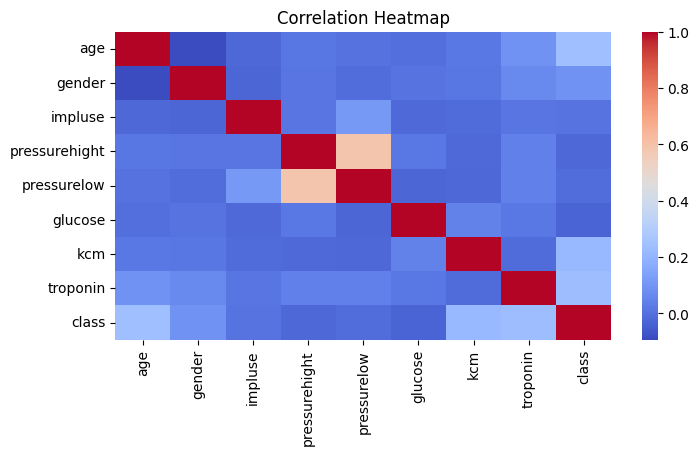

In [318]:
correlation_matrix = df.corr() #Correlation between all columns
plt.figure(figsize=(8,4)) #width,height
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [319]:
x = df.iloc[:,:-1]
y = df["class"]

# Here Random sample use for create equle value of target

In [320]:
ru = RandomOverSampler()
x,y = ru.fit_resample(x,y)

In [321]:
y.value_counts()

class
0.0    810
1.0    810
Name: count, dtype: int64

# splitting the model in train & test mode

In [322]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression

In [323]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\ProgramData\anaconda3\envs\bia\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [324]:
y_pred = lr.predict(x_test)

In [325]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83


# Decision Tree

In [326]:
clf = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=5, min_samples_leaf=2)
clf.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2)

In [327]:
y_pred = clf.predict(x_test)

In [328]:

y_pred= (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


# confusion matrix

In [329]:
cf = confusion_matrix(y_test, y_pred)
print("confusion Matrix")
print(cf)

confusion Matrix
[[167   1]
 [  2 154]]


# classification report

In [330]:
cr = classification_report(y_test, y_pred)
print("classification_report")
print(cr)

classification_report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       168
         1.0       0.99      0.99      0.99       156

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



# Random Forest - Bagging

In [331]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [332]:
rf_y_pred = rf.predict(x_test)

In [333]:
rf_y_pred= (y_pred > 0.5).astype(int)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


# AdaBoost Classifier

In [334]:
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(x_train, y_train)

c:\ProgramData\anaconda3\envs\bia\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [335]:
ab_y_pred = ab.predict(x_test)

In [336]:
ab_y_pred= (y_pred > 0.5).astype(int)

ab_accuracy = accuracy_score(y_test, ab_y_pred)
ab_precision = precision_score(y_test, ab_y_pred, average='weighted')
ab_recall = recall_score(y_test, ab_y_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_y_pred, average='weighted')

print(f"Accuracy: {ab_accuracy:.2f}")
print(f"Precision: {ab_precision:.2f}")
print(f"Recall: {ab_recall:.2f}")
print(f"F1 Score: {ab_f1:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


# Print all Accuracy score

In [337]:

print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Adaboost Accuracy: {ab_accuracy:.2f}")

Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99
Adaboost Accuracy: 0.99


# Here check our model is overfitted or not

In [338]:
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.9845849511887409, 0.9620570755774838)

In [339]:
rf.score(x_train, y_train), rf.score(x_test, y_test)


(1.0, 0.9907407407407407)

In [340]:
ab.score(x_train, y_train), ab.score(x_test, y_test)


(1.0, 0.9876543209876543)